##**Machine Learning for Smart Health Systems: Project-3**

**Instructions:**

* Select a 12 lead ECG database (e.g. St. Petersburg INCART Database or PTB Diagnostic ECG database) from Physionet and read the dataset descriptions to identify the heart patient types (e.g MI, CAD, TIA, Other)

* Have a look at the project 3 starter notebook

* load and process the dataset using python WFDB, neurokit, biosppy etc. packages

* read about the different ECG channels and pick the best channel signal e.g. V2, V5 etc.

* divide each ECG record into 1 minute chunks so in total you have 32 x no of hours x 60 ~ 23000 samples

**Option 1 (INCART):**

* Develop an articial neural network for multi-category heart disease classification from single channel ECG

* Develop a 1-D convolutional neural network for multi-category heart disease classification from single channel ECG

* Compare the performances of the developed deep learning models

* Upload/Pull request your notebook on Smart Health course Github Project-3 branch

**Option 2 (PTBDB) :**

* Develop an articial neural network for myocardial infarction classification from healthy subjects using single channel ECG

* Develop a 1-D convolutional neural network for multi-category heart disease classification from single channel ECG

* Compare the performances of the developed deep learning models
Upload/Pull request your notebook on Smart Health course Github Project-3 branch

**References:**

* https://physionet.org/content/incartdb/1.0.0/
* https://neurokit2.readthedocs.io/en/latest/

* MLSH-L2-P3.ipynb notebook from Lecture-2

* MLSH-L3-P3.ipynb notebook from Lecture-3

* MLSH-L3 starter notebook from Lecture-3
* https://www.analyticsvidhya.com/blog/2021/07/convolution-neural-network-the-base-for-many-deep-learning-algorithms-cnn-illustrated-by-1-d-ecg-signal-physionet/



###Download St. Petersburg INCART Database from PhysioNet Database

In [1]:
#Install required python packages 
#Native Python waveform-database (WFDB) package
!pip install wfdb 

In [2]:
!pip install peakutils

In [3]:
# Python packages for display and analysis
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import wfdb
from wfdb import processing
import peakutils

In [4]:
# List the PhysioNet Databases
dbs = wfdb.get_dbs()
display(dbs)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['autonomic-aging-cardiovascular',
  'Autonomic Aging: A dataset to quantify changes of cardiovascular autonomic function during healthy aging'],
 ['bhx-brain-bounding-box',
  'Brain Hemorrhage Extended (BHX): Bounding box extrapolation from thick to thin slice CT images'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bigideaslab-step-hr-smartwatch',
  'BigIdeasLab_STEP: Heart rate measurements captured by smartwatch

In [5]:
# Download apnea-ECG records from the small PhysioNet Database: https://physionet.org/content/incartdb/1.0.0/

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('incartdb', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

Generating record list for: I01
Generating record list for: I02
Generating record list for: I03
Generating record list for: I04
Generating record list for: I05
Generating record list for: I06
Generating record list for: I07
Generating record list for: I08
Generating record list for: I09
Generating record list for: I10
Generating record list for: I11
Generating record list for: I12
Generating record list for: I13
Generating record list for: I14
Generating record list for: I15
Generating record list for: I16
Generating record list for: I17
Generating record list for: I18
Generating record list for: I19
Generating record list for: I20
Generating record list for: I21
Generating record list for: I22
Generating record list for: I23
Generating record list for: I24
Generating record list for: I25
Generating record list for: I26
Generating record list for: I27
Generating record list for: I28
Generating record list for: I29
Generating record list for: I30
Generating record list for: I31
Generati

['I40.hea',
 'I59.hea',
 'I50.dat',
 'I46.hea',
 'I21.atr',
 'I56.atr',
 'I49.hea',
 'I23.atr',
 'I64.dat',
 'I03.dat',
 'I42.atr',
 'I32.hea',
 'I73.dat',
 'I60.dat',
 'I33.atr',
 'I56.dat',
 'I24.dat',
 'I18.dat',
 'I35.atr',
 'I07.hea',
 'I64.hea',
 'I28.dat',
 'I13.dat',
 'I72.dat',
 'I08.dat',
 'I60.atr',
 'I14.atr',
 'I54.dat',
 'I73.hea',
 'I26.atr',
 'I61.atr',
 'I21.hea',
 'I73.atr',
 'I67.hea',
 'I12.hea',
 'I55.hea',
 'I49.atr',
 'I69.dat',
 'I06.hea',
 'I49.dat',
 'I17.dat',
 'I69.atr',
 'I52.atr',
 'I66.dat',
 'I60.hea',
 'I41.atr',
 'I17.atr',
 'I58.atr',
 'I51.atr',
 'I30.dat',
 'I11.atr',
 'I65.hea',
 'I30.hea',
 'I28.atr',
 'I42.hea',
 'I52.dat',
 'I47.dat',
 'I71.dat',
 'I14.hea',
 'I61.dat',
 'I48.atr',
 'I55.dat',
 'I47.hea',
 'I39.dat',
 'I46.dat',
 'I47.atr',
 'I24.hea',
 'I34.atr',
 'I27.hea',
 'I67.dat',
 'I09.hea',
 'I02.atr',
 'I38.atr',
 'I36.dat',
 'I46.atr',
 'I01.atr',
 'I64.atr',
 'I28.hea',
 'I07.dat',
 'I19.atr',
 'I65.atr',
 'I09.atr',
 'I22.hea',
 'I2

In [6]:
# Find the list of records to consider
rec_list = list(set([os.path.splitext(x)[0] for x in os.listdir(dl_dir)]))
# Remove records of the form '...er', which are recordings with the four additional 
# signals that we will not consider here.
rec_list = [record for record in rec_list if record[-1]!='r']

In [7]:
rec_list

['I58',
 'I41',
 'I74',
 'I64',
 'I12',
 'I49',
 'I07',
 'I06',
 'I30',
 'I02',
 'I03',
 'I08',
 'I17',
 'I51',
 'I01',
 'I27',
 'I46',
 'I18',
 'I35',
 'I65',
 'I24',
 'I70',
 'I28',
 'I34',
 'I16',
 'I21',
 'I31',
 'I63',
 'I33',
 'I14',
 'I68',
 'I48',
 'I62',
 'I47',
 'I19',
 'I55',
 'I56',
 'I05',
 'I29',
 'I60',
 'I40',
 'I37',
 'I71',
 'I57',
 'I13',
 'I15',
 'I39',
 'I36',
 'I73',
 'I44',
 'I43',
 'I69',
 'I66',
 'I11',
 'I52',
 'I61',
 'I23',
 'I38',
 'I42',
 'I09',
 'I10',
 'I67',
 'I53',
 'I59',
 'I25',
 'I22',
 'I75',
 'I26',
 'I72',
 'I54',
 'I50',
 'I20',
 'I32',
 'I45',
 'I04']

In [8]:
len(rec_list)

75

In [9]:
type(rec_list)

list

## Pre-processing and peak detection

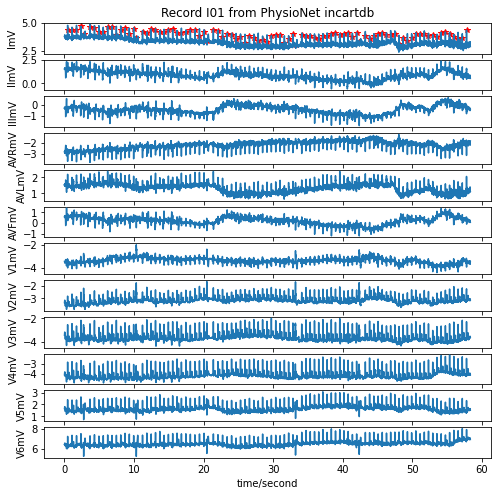

{'adc_gain': [306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0],
 'adc_res': [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'block_size': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'byte_offset': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'checksum': [45915,
  19370,
  28951,
  36744,
  4279,
  48597,
  50823,
  1143,
  53553,
  1654,
  45377,
  33137],
 'comments': ['<age>: 65 <sex>: F <diagnoses> Coronary artery disease, arterial hypertension',
  'patient 1',
  'PVCs, noise'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
 

In [179]:
# Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('/content/tmp_dl_dir/I01', sampto = 15000)
annotation = wfdb.rdann('/content/tmp_dl_dir/I01', 'atr', sampto = 15000)

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record I01 from PhysioNet incartdb',
               time_units='seconds')
display(record.__dict__)

**Comment:** There are 12 ECG signal channels in this dataset : 

'I', 'II',  'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'

In [11]:
type(record)

wfdb.io.record.Record

In [12]:
# Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals_ch0, fields = wfdb.rdsamp('/content/tmp_dl_dir/I01', channels=[10], sampfrom=0, sampto=1000)
display(signals_ch0)
display(fields)

array([[1.65359477],
       [1.66013072],
       [1.67320261],
       [1.66339869],
       [1.70261438],
       [1.76470588],
       [1.7745098 ],
       [1.7875817 ],
       [1.80392157],
       [1.78104575],
       [1.72222222],
       [1.70915033],
       [1.72875817],
       [1.6503268 ],
       [1.60130719],
       [1.6372549 ],
       [1.66666667],
       [1.71568627],
       [1.76470588],
       [1.75490196],
       [1.72222222],
       [1.66993464],
       [1.63398693],
       [1.60457516],
       [1.55555556],
       [1.52614379],
       [1.49346405],
       [1.5       ],
       [1.49346405],
       [1.45098039],
       [1.41176471],
       [1.42810458],
       [1.46405229],
       [1.49346405],
       [1.48366013],
       [1.50653595],
       [1.50980392],
       [1.47058824],
       [1.48039216],
       [1.53594771],
       [1.58823529],
       [1.62091503],
       [1.64705882],
       [1.67647059],
       [1.66013072],
       [1.64379085],
       [1.63398693],
       [1.624

{'base_date': None,
 'base_time': None,
 'comments': ['<age>: 65 <sex>: F <diagnoses> Coronary artery disease, arterial hypertension',
  'patient 1',
  'PVCs, noise'],
 'fs': 257,
 'n_sig': 1,
 'sig_len': 1000,
 'sig_name': ['V5'],
 'units': ['mV']}

In [13]:
# Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(10, 5), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app


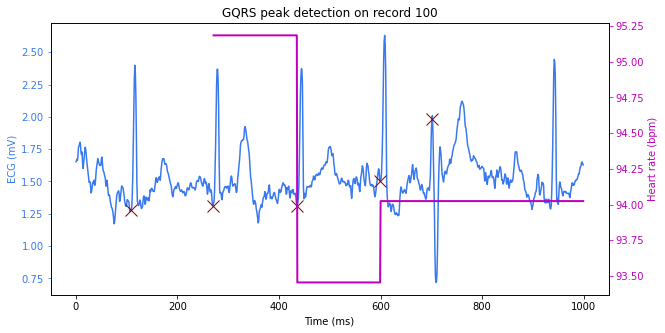

Corrected GQRS detected peak indices: [116, 279, 444, 608, 760]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app


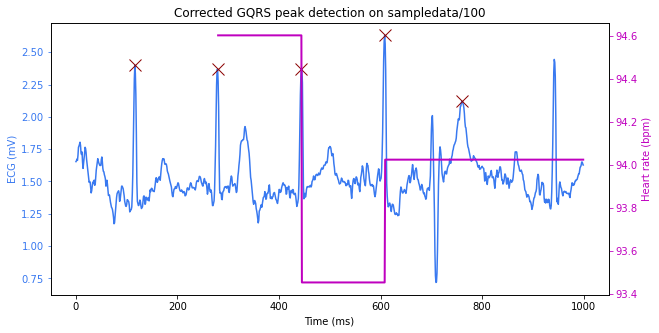

In [14]:

# Load the WFDB record and the physical samples
record = wfdb.rdrecord('/content/tmp_dl_dir/I01', sampfrom=0, sampto=1000, channels=[10])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record 100")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")

In [15]:
# Load the WFDB record and the physical samples
signals, fields = wfdb.rdsamp('/content/tmp_dl_dir/I01', channels=[10])

In [16]:
signals.shape

(462600, 1)

In [17]:
print(signals.T.shape)

(1, 462600)


In [18]:
signals_T=signals.T
print(signals_T.shape)
np.savetxt("/content/data.csv", signals_T, delimiter=",")

(1, 462600)


In [19]:
!pip install neurokit2

In [20]:
import neurokit2 as nk

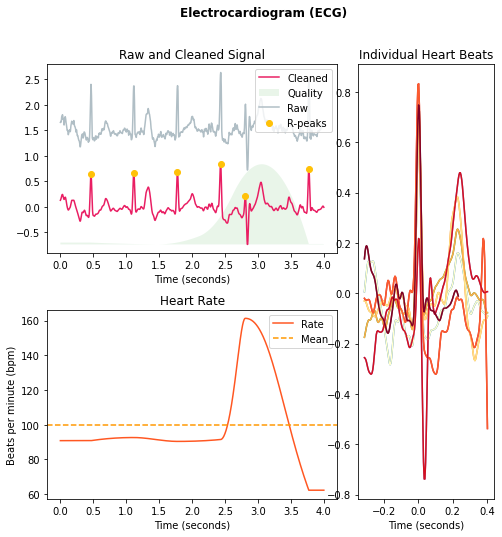

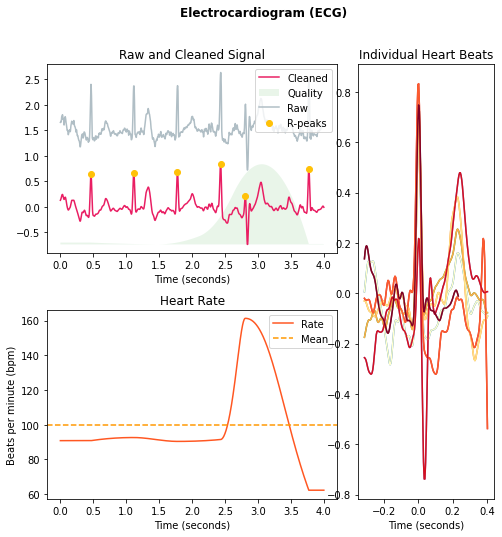

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

# Process it
signals, info = nk.ecg_process(signals_ch0.flatten() , sampling_rate=250)

# Visualise the processing
nk.ecg_plot(signals, sampling_rate=250)

### Feature extraction, 

https://physionet.org/content/incartdb/1.0.0/

In [22]:
results_signals = []
results_fields=[]
for record in rec_list:
  for rec_name in rec_list:
    signals, fields = wfdb.rdsamp('/content/tmp_dl_dir/'+ rec_name, channels=[10], sampfrom=0, sampto=500)
    results_signals.append(signals)
    results_signals.insert(0,rec_name)
    results_fields.append(rec_name)
    results_fields.insert(0,fields)
#print(results_signals)
#print(results_fields)

In [23]:
#Signal values for V5 channel extracted to csv file
import csv
csv_file = "signals_data_v5_channel_500samples.csv"
write_column = True
with open(csv_file, 'w', newline="") as csvfile:
  if write_column:
    csv_columns = signals
    writer = csv.writer(csvfile)
    writer.writerows(results_signals)

In [24]:
#field values of V5 channel extracted to csv file
import csv
csv_columns = ['base_date','base_time', 'comments', 'fs', 'n_sig', 'sig_len','sig_name','units' ]
dict_data = results_fields
csv_file = "Names.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(csv_columns)
        for data in dict_data:
            writer.writerows(data)
except IOError:
    print("I/O error")

In [88]:
#load the extracted signal values into the notebook
import pandas as pd
signals_data = pd.read_csv('/content/signals_data_v5_channel_500samples (1).csv',header=None)
signals_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503
0,I26,I,2,6,0.205572,0.203650,0.204611,0.211335,0.211335,0.203650,0.206532,0.203650,0.212296,0.206532,0.219020,0.197887,0.191162,0.200768,0.196926,0.195965,0.196926,0.197887,0.197887,0.194044,0.185399,0.176753,0.178674,0.190202,0.199808,0.199808,0.197887,0.196926,0.193084,0.186359,0.196926,0.186359,0.176753,0.183477,0.197887,0.197887,...,0.232469,0.249760,0.247839,0.253602,0.256484,0.268972,0.258405,0.259366,0.259366,0.257445,0.264169,0.265130,0.264169,0.258405,0.243036,0.249760,0.243036,0.246878,0.234390,0.230548,0.234390,0.232469,0.220941,0.215178,0.218060,0.221902,0.207493,0.219020,0.217099,0.219020,0.224784,0.226705,0.219981,0.218060,0.218060,0.214217,0.218060,0.217099,0.214217,0.217099
1,I59,I,5,9,-0.460194,-0.473786,-0.479612,-0.485437,-0.487379,-0.481553,-0.479612,-0.481553,-0.481553,-0.479612,-0.473786,-0.471845,-0.469903,-0.471845,-0.499029,-0.518447,-0.526214,-0.532039,-0.535922,-0.535922,-0.533981,-0.533981,-0.539806,-0.541748,-0.537864,-0.537864,-0.555340,-0.557282,-0.547573,-0.549515,-0.559223,-0.549515,-0.549515,-0.559223,-0.565049,-0.551456,...,-0.576699,-0.576699,-0.574757,-0.584466,-0.586408,-0.594175,-0.590291,-0.590291,-0.594175,-0.592233,-0.590291,-0.594175,-0.588350,-0.584466,-0.586408,-0.590291,-0.584466,-0.578641,-0.576699,-0.578641,-0.574757,-0.572816,-0.566990,-0.559223,-0.549515,-0.545631,-0.539806,-0.535922,-0.532039,-0.533981,-0.535922,-0.537864,-0.532039,-0.528155,-0.522330,-0.524272,-0.528155,-0.524272,-0.526214,-0.530097
2,I24,I,2,4,7.380719,7.302288,7.243464,7.209150,7.225490,7.235294,7.207516,7.186275,7.218954,7.210784,7.184641,7.163399,7.135621,7.122549,7.106209,7.083333,7.060458,7.057190,7.040850,7.029412,7.001634,6.962418,6.947712,6.955882,6.923203,6.885621,6.854575,6.844771,6.830065,6.799020,6.771242,6.758170,6.756536,6.756536,6.758170,6.774510,...,7.550654,7.557190,7.552288,7.562091,7.558824,7.542484,7.544118,7.547386,7.544118,7.532680,7.529412,7.535948,7.535948,7.558824,7.568627,7.555556,7.534314,7.529412,7.529412,7.531046,7.535948,7.552288,7.557190,7.550654,7.547386,7.544118,7.550654,7.553922,7.549020,7.540850,7.532680,7.531046,7.526144,7.542484,7.545752,7.539216,7.542484,7.552288,7.542484,7.534314
3,I73,I,7,3,-4.543744,-4.528692,-4.539981,-4.549389,-4.557855,-4.556914,-4.564440,-4.562559,-4.563500,-4.569144,-4.568203,-4.574788,-4.574788,-4.572907,-4.579492,-4.582314,-4.584196,-4.587018,-4.587018,-4.589840,-4.596425,-4.600188,-4.601129,-4.604892,-4.607714,-4.611477,-4.619003,-4.617121,-4.622766,-4.625588,-4.632173,-4.631232,-4.634055,-4.641580,-4.650047,-4.651929,...,-4.532455,-4.533396,-4.529633,-4.536218,-4.535278,-4.535278,-4.530574,-4.533396,-4.534337,-4.532455,-4.531515,-4.533396,-4.534337,-4.533396,-4.535278,-4.535278,-4.533396,-4.530574,-4.534337,-4.536218,-4.532455,-4.535278,-4.534337,-4.536218,-4.531515,-4.536218,-4.536218,-4.535278,-4.531515,-4.533396,-4.531515,-4.531515,-4.532455,-4.532455,-4.530574,-4.532455,-4.534337,-4.531515,-4.531515,-4.528692
4,I44,I,4,4,0.745543,0.747164,0.747164,0.745543,0.745543,0.747164,0.743922,0.742301,0.743922,0.742301,0.742301,0.740681,0.740681,0.739060,0.739060,0.739060,0.739060,0.739060,0.740681,0.740681,0.740681,0.742301,0.740681,0.740681,0.739060,0.740681,0.743922,0.737439,0.732577,0.737439,0.750405,0.768233,0.781199,0.781199,0.786062,0.795786,...,0.787682,0.789303,0.790924,0.792545,0.795786,0.799028,0.800648,0.805511,0.810373,0.813614,0.815235,0.816856,0.816856,0.818477,0.818477,0.816856,0.815235,0.813614,0.811994,0.805511,0.799028,0.794165,0.790924,0.784441,0.781199,0.776337,0.769854,0.763371,0.760130,0.758509,0.753647,0.753647,0.750405,0.750405,0.748784,0.748784,0.750405,0.750405,0.750405,0.755267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [89]:
#drop unnecessary columns
signals_data.drop(signals_data.columns[[1,2,3]],axis=1,inplace=True)
signals_data

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503
0,I26,0.205572,0.203650,0.204611,0.211335,0.211335,0.203650,0.206532,0.203650,0.212296,0.206532,0.219020,0.197887,0.191162,0.200768,0.196926,0.195965,0.196926,0.197887,0.197887,0.194044,0.185399,0.176753,0.178674,0.190202,0.199808,0.199808,0.197887,0.196926,0.193084,0.186359,0.196926,0.186359,0.176753,0.183477,0.197887,0.197887,0.185399,0.175793,0.174832,...,0.232469,0.249760,0.247839,0.253602,0.256484,0.268972,0.258405,0.259366,0.259366,0.257445,0.264169,0.265130,0.264169,0.258405,0.243036,0.249760,0.243036,0.246878,0.234390,0.230548,0.234390,0.232469,0.220941,0.215178,0.218060,0.221902,0.207493,0.219020,0.217099,0.219020,0.224784,0.226705,0.219981,0.218060,0.218060,0.214217,0.218060,0.217099,0.214217,0.217099
1,I59,-0.460194,-0.473786,-0.479612,-0.485437,-0.487379,-0.481553,-0.479612,-0.481553,-0.481553,-0.479612,-0.473786,-0.471845,-0.469903,-0.471845,-0.499029,-0.518447,-0.526214,-0.532039,-0.535922,-0.535922,-0.533981,-0.533981,-0.539806,-0.541748,-0.537864,-0.537864,-0.555340,-0.557282,-0.547573,-0.549515,-0.559223,-0.549515,-0.549515,-0.559223,-0.565049,-0.551456,-0.553398,-0.543689,-0.537864,...,-0.576699,-0.576699,-0.574757,-0.584466,-0.586408,-0.594175,-0.590291,-0.590291,-0.594175,-0.592233,-0.590291,-0.594175,-0.588350,-0.584466,-0.586408,-0.590291,-0.584466,-0.578641,-0.576699,-0.578641,-0.574757,-0.572816,-0.566990,-0.559223,-0.549515,-0.545631,-0.539806,-0.535922,-0.532039,-0.533981,-0.535922,-0.537864,-0.532039,-0.528155,-0.522330,-0.524272,-0.528155,-0.524272,-0.526214,-0.530097
2,I24,7.380719,7.302288,7.243464,7.209150,7.225490,7.235294,7.207516,7.186275,7.218954,7.210784,7.184641,7.163399,7.135621,7.122549,7.106209,7.083333,7.060458,7.057190,7.040850,7.029412,7.001634,6.962418,6.947712,6.955882,6.923203,6.885621,6.854575,6.844771,6.830065,6.799020,6.771242,6.758170,6.756536,6.756536,6.758170,6.774510,6.802288,6.825163,6.856209,...,7.550654,7.557190,7.552288,7.562091,7.558824,7.542484,7.544118,7.547386,7.544118,7.532680,7.529412,7.535948,7.535948,7.558824,7.568627,7.555556,7.534314,7.529412,7.529412,7.531046,7.535948,7.552288,7.557190,7.550654,7.547386,7.544118,7.550654,7.553922,7.549020,7.540850,7.532680,7.531046,7.526144,7.542484,7.545752,7.539216,7.542484,7.552288,7.542484,7.534314
3,I73,-4.543744,-4.528692,-4.539981,-4.549389,-4.557855,-4.556914,-4.564440,-4.562559,-4.563500,-4.569144,-4.568203,-4.574788,-4.574788,-4.572907,-4.579492,-4.582314,-4.584196,-4.587018,-4.587018,-4.589840,-4.596425,-4.600188,-4.601129,-4.604892,-4.607714,-4.611477,-4.619003,-4.617121,-4.622766,-4.625588,-4.632173,-4.631232,-4.634055,-4.641580,-4.650047,-4.651929,-4.658514,-4.662277,-4.672625,...,-4.532455,-4.533396,-4.529633,-4.536218,-4.535278,-4.535278,-4.530574,-4.533396,-4.534337,-4.532455,-4.531515,-4.533396,-4.534337,-4.533396,-4.535278,-4.535278,-4.533396,-4.530574,-4.534337,-4.536218,-4.532455,-4.535278,-4.534337,-4.536218,-4.531515,-4.536218,-4.536218,-4.535278,-4.531515,-4.533396,-4.531515,-4.531515,-4.532455,-4.532455,-4.530574,-4.532455,-4.534337,-4.531515,-4.531515,-4.528692
4,I44,0.745543,0.747164,0.747164,0.745543,0.745543,0.747164,0.743922,0.742301,0.743922,0.742301,0.742301,0.740681,0.740681,0.739060,0.739060,0.739060,0.739060,0.739060,0.740681,0.740681,0.740681,0.742301,0.740681,0.740681,0.739060,0.740681,0.743922,0.737439,0.732577,0.737439,0.750405,0.768233,0.781199,0.781199,0.786062,0.795786,0.807131,0.818477,0.826580,...,0.787682,0.789303,0.790924,0.792545,0.795786,0.799028,0.800648,0.805511,0.810373,0.813614,0.815235,0.816856,0.816856,0.818477,0.818477,0.816856,0.815235,0.813614,0.811994,0.805511,0.799028,0.794165,0.790924,0.784441,0.781199,0.776337,0.769854,0.763371,0.760130,0.758509,0.753647,0.753647,0.750405,0.750405,0.748784,0.74

In [90]:
#load the patient diagnosis file which is available on the physionet website of incart database
diagnosis_data = pd.read_csv('/content/12_lead_ecg_signals_diagnosis.csv')
diagnosis_data

,record_name,n_sig,fs,sig_len,Age,Patient_no,Sex,Diagnosis,Heart Beat type used for diagnosis
0,I01,12,257,10000,65,1,F,CAD,"PVCs, noise"
1,I02,12,257,10000,65,1,F,CAD,"ventricular trigeminy, ventricular couplets"
2,I03,12,257,10000,59,2,M,MI,"ST elevation, PVCs"
3,I04,12,257,10000,59,2,M,MI,"bradycardia, tachycardia, PVCs, ventricular co..."
4,I05,12,257,10000,59,2,M,MI,paroxysmal VT
...,...,...,...,...,...,...,...,...,...
70,I71,12,257,10000,64,30,M,Other,"paroxysmal atrial fibrillation, WPW, bundle-br..."
71,I72,12,257,10000,73,31,M,CAD,PVCs and couplets on tachycardia
72,I73,12,257,10000,73,31,M,CAD,"PVCs on bradycardia, SVEBs, couplets"
73,I74,12,257,10000,66,32,M,MI,numerous fusion beats and PVCs on tachycardia


In [92]:
#checking the datatypes
diagnosis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   record_name                         75 non-null     object
 1   n_sig                               75 non-null     int64 
 2   fs                                  75 non-null     int64 
 3   sig_len                             75 non-null     int64 
 4   Age                                 75 non-null     int64 
 5   Patient_no                          75 non-null     int64 
 6   Sex                                 75 non-null     object
 7   Diagnosis                           75 non-null     object
 8   Heart Beat type used for diagnosis  75 non-null     object
dtypes: int64(5), object(4)
memory usage: 5.4+ KB


In [93]:
#assigning the label values: 0,1,2,3
diagnosis_data['label'] = ''
diagnosis_data.loc[diagnosis_data['Diagnosis'] == 'CAD','label'] = 0
diagnosis_data.loc[diagnosis_data['Diagnosis'] == 'MI','label'] = 1
diagnosis_data.loc[diagnosis_data['Diagnosis'] == 'TIA','label'] = 2
diagnosis_data.loc[diagnosis_data['Diagnosis'] == 'Other','label'] = 3
diagnosis_data

,record_name,n_sig,fs,sig_len,Age,Patient_no,Sex,Diagnosis,Heart Beat type used for diagnosis,label
0,I01,12,257,10000,65,1,F,CAD,"PVCs, noise",0
1,I02,12,257,10000,65,1,F,CAD,"ventricular trigeminy, ventricular couplets",0
2,I03,12,257,10000,59,2,M,MI,"ST elevation, PVCs",1
3,I04,12,257,10000,59,2,M,MI,"bradycardia, tachycardia, PVCs, ventricular co...",1
4,I05,12,257,10000,59,2,M,MI,paroxysmal VT,1
...,...,...,...,...,...,...,...,...,...,...
70,I71,12,257,10000,64,30,M,Other,"paroxysmal atrial fibrillation, WPW, bundle-br...",3
71,I72,12,257,10000,73,31,M,CAD,PVCs and couplets on tachycardia,0
72,I73,12,257,10000,73,31,M,CAD,"PVCs on bradycardia, SVEBs, couplets",0
73,I74,12,257,10000,66,32,M,MI,numerous fusion beats and PVCs on tachycardia,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

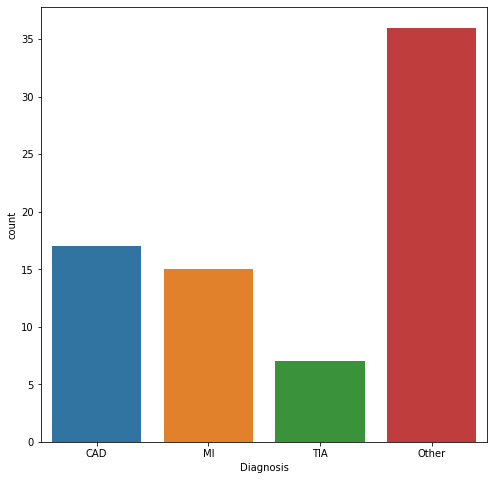

In [94]:
#Plot the dignosis feature
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(diagnosis_data['Diagnosis'])

The following is for mapping the labels to associated record_name which is done manually by cross referencing with both csv files.

In [95]:
signals_data['diagnosis']=''
signals_data.rename(columns={0: 'record_name'},inplace= True)

In [96]:
signals_data.loc[signals_data['record_name'].isin(['I01','I02','I20','I21','I22','I35','I36','I37','I38','I39','I44','I45','I46','I57','I58','I72','I73']),'diagnosis'] = 'CAD'

In [97]:
signals_data.loc[signals_data['record_name'].isin(['I03','I04','I05','I23','I24','I47','I48','I54','I55','I56','I62','I63','I64','I74','I75']),'diagnosis'] = 'MI'

In [98]:
signals_data.loc[signals_data['record_name'].isin(['I06','I07','I15','I16','I17','I40','I41']),'diagnosis'] = 'TIA'

In [99]:
signals_data.loc[signals_data['record_name'].isin(['I08','I09','I10','I11','I12','I13','I14','I18','I19','I25','I26','I27','I28','I29','I30',
                                                   'I31','I32','I33','I34','I42','I43','I49','I50','I51','I52','I53','I59','I60','I61','I65','I66','I67','I68','I69','I70',
                                                   'I71']),'diagnosis'] = 'Other'

In [100]:
signals_data.sort_values(by = 'record_name')

,record_name,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,diagnosis
4040,I01,-0.199352,-0.19611,-0.197731,-0.196110,-0.197731,-0.197731,-0.194489,-0.194489,-0.192869,-0.194489,-0.191248,-0.184765,-0.175041,-0.166937,-0.157212,-0.155592,-0.147488,-0.137763,-0.134522,-0.132901,-0.13128,-0.129660,-0.128039,-0.119935,-0.100486,-0.082658,-0.084279,-0.097245,-0.119935,-0.124797,-0.119935,-0.116694,-0.119935,-0.124797,-0.129660,-0.139384,-0.150729,-0.165316,-0.181523,...,0.196110,0.197731,0.200972,0.204214,0.205835,0.204214,0.202593,0.197731,0.186386,0.178282,0.162075,0.152350,0.137763,0.116694,0.098865,0.079417,0.059968,0.042139,0.025932,0.008104,-0.006483,-0.021070,-0.034036,-0.047002,-0.056726,-0.064830,-0.069692,-0.072934,-0.072934,-0.072934,-0.077796,-0.077796,-0.082658,-0.084279,-0.084279,-0.085900,-0.082658,-0.079417,-0.077796,CAD
140,I01,-0.199352,-0.19611,-0.197731,-0.196110,-0.197731,-0.197731,-0.194489,-0.194489,-0.192869,-0.194489,-0.191248,-0.184765,-0.175041,-0.166937,-0.157212,-0.155592,-0.147488,-0.137763,-0.134522,-0.132901,-0.13128,-0.129660,-0.128039,-0.119935,-0.100486,-0.082658,-0.084279,-0.097245,-0.119935,-0.124797,-0.119935,-0.116694,-0.119935,-0.124797,-0.129660,-0.139384,-0.150729,-0.165316,-0.181523,...,0.196110,0.197731,0.200972,0.204214,0.205835,0.204214,0.202593,0.197731,0.186386,0.178282,0.162075,0.152350,0.137763,0.116694,0.098865,0.079417,0.059968,0.042139,0.025932,0.008104,-0.006483,-0.021070,-0.034036,-0.047002,-0.056726,-0.064830,-0.069692,-0.072934,-0.072934,-0.072934,-0.077796,-0.077796,-0.082658,-0.084279,-0.084279,-0.085900,-0.082658,-0.079417,-0.077796,CAD
1865,I01,-0.199352,-0.19611,-0.197731,-0.196110,-0.197731,-0.197731,-0.194489,-0.194489,-0.192869,-0.194489,-0.191248,-0.184765,-0.175041,-0.166937,-0.157212,-0.155592,-0.147488,-0.137763,-0.134522,-0.132901,-0.13128,-0.129660,-0.128039,-0.119935,-0.100486,-0.082658,-0.084279,-0.097245,-0.119935,-0.124797,-0.119935,-0.116694,-0.119935,-0.124797,-0.129660,-0.139384,-0.150729,-0.165316,-0.181523,...,0.196110,0.197731,0.200972,0.204214,0.205835,0.204214,0.202593,0.197731,0.186386,0.178282,0.162075,0.152350,0.137763,0.116694,0.098865,0.079417,0.059968,0.042139,0.025932,0.008104,-0.006483,-0.021070,-0.034036,-0.047002,-0.056726,-0.064830,-0.069692,-0.072934,-0.072934,-0.072934,-0.077796,-0.077796,-0.082658,-0.084279,-0.084279,-0.085900,-0.082658,-0.079417,-0.077796,CAD
5465,I01,-0.199352,-0.19611,-0.197731,-0.196110,-0.197731,-0.197731,-0.194489,-0.194489,-0.192869,-0.194489,-0.191248,-0.184765,-0.175041,-0.166937,-0.157212,-0.155592,-0.147488,-0.137763,-0.134522,-0.132901,-0.13128,-0.129660,-0.128039,-0.119935,-0.100486,-0.082658,-0.084279,-0.097245,-0.119935,-0.124797,-0.119935,-0.116694,-0.119935,-0.124797,-0.129660,-0.139384,-0.150729,-0.165316,-0.181523,...,0.196110,0.197731,0.200972,0.204214,0.205835,0.204214,0.202593,0.197731,0.186386,0.178282,0.162075,0.152350,0.137763,0.116694,0.098865,0.079417,0.059968,0.042139,0.025932,0.008104,-0.006483,-0.021070,-0.034036,-0.047002,-0.056726,-0.064830,-0.069692,-0.072934,-0.072934,-0.072934,-0.077796,-0.077796,-0.082658,-0.084279,-0.084279,-0.085900,-0.082658,-0.079417,-0.077796,CAD
3140,I01,-0.199352,-0.19611,-0.197731,-0.196110,-0.197731,-0.197731,-0.194489,-0.194489,-0.192869,-0.194489,-0.191248,-0.184765,-0.175041,-0.166937,-0.157212,-0.155592,-0.147488,-0.137763,-0.134522,-0.132901,-0.13128,-0.129660,-0.128039,-0.119935,-0.100486,-0.082658,-0.084279,-0.097245,-0.119935,-0.124797,-0.119935,-0.116694,-0.119935,-0.124797,-0.129660,-0.139384,-0.150729,-0.165316,-0.181523,...,0.196110,0.197731,0.200972,0.204214,0.205835,0.204214,0.202593,0.197731,0.186386,0.178282,0.162075,0.152350,0.137763,0.116694,0.098865,0.079417,0.059968,0.042139,0.025932,0.008104,-0.006483,-0.021070,-0.034

In [101]:
#checking the null values
signals_data.isna().sum()

record_name    0
4              0
5              0
6              0
7              0
              ..
500            0
501            0
502            0
503            0
diagnosis      0
Length: 502, dtype: int64

In [102]:
#checking the diagnosis counted values
target_dist = signals_data['diagnosis'].value_counts()
target_dist

Other    2700
CAD      1275
MI       1125
TIA       525
Name: diagnosis, dtype: int64

<Figure size 1440x720 with 0 Axes>

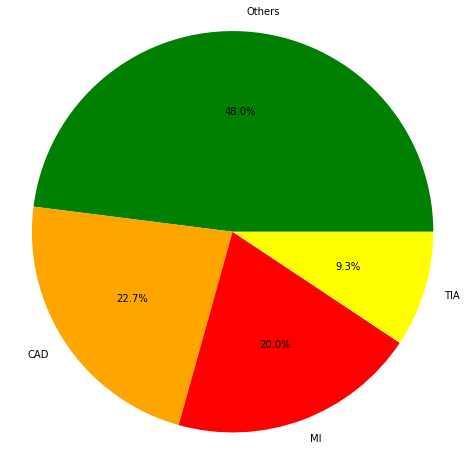

In [103]:
#pie chart of target class
import matplotlib.pyplot as plt
target_dist = signals_data['diagnosis'].value_counts()
plt.figure(figsize=(20,10))
fig1, ax1 = plt.subplots()
my_circle=plt.Circle( (0,0), 0.7)
ax1.pie(target_dist, labels=['Others','CAD','MI','TIA'], colors=['green','orange','red','yellow'],autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [108]:
# Including a target lable value also for use in the Deep Learning models
signals_data["label"]=" "
signals_data.loc[signals_data['diagnosis'] == "CAD" , 'label'] = 0
signals_data.loc[signals_data['diagnosis'] == "MI" , 'label'] = 1
signals_data.loc[signals_data['diagnosis'] == "TIA" , 'label'] = 2
signals_data.loc[signals_data['diagnosis'] == "Other" , 'label'] = 3

In [109]:
signals_data

,record_name,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,diagnosis,label
0,I26,0.205572,0.203650,0.204611,0.211335,0.211335,0.203650,0.206532,0.203650,0.212296,0.206532,0.219020,0.197887,0.191162,0.200768,0.196926,0.195965,0.196926,0.197887,0.197887,0.194044,0.185399,0.176753,0.178674,0.190202,0.199808,0.199808,0.197887,0.196926,0.193084,0.186359,0.196926,0.186359,0.176753,0.183477,0.197887,0.197887,0.185399,0.175793,0.174832,...,0.247839,0.253602,0.256484,0.268972,0.258405,0.259366,0.259366,0.257445,0.264169,0.265130,0.264169,0.258405,0.243036,0.249760,0.243036,0.246878,0.234390,0.230548,0.234390,0.232469,0.220941,0.215178,0.218060,0.221902,0.207493,0.219020,0.217099,0.219020,0.224784,0.226705,0.219981,0.218060,0.218060,0.214217,0.218060,0.217099,0.214217,0.217099,Other,3
1,I59,-0.460194,-0.473786,-0.479612,-0.485437,-0.487379,-0.481553,-0.479612,-0.481553,-0.481553,-0.479612,-0.473786,-0.471845,-0.469903,-0.471845,-0.499029,-0.518447,-0.526214,-0.532039,-0.535922,-0.535922,-0.533981,-0.533981,-0.539806,-0.541748,-0.537864,-0.537864,-0.555340,-0.557282,-0.547573,-0.549515,-0.559223,-0.549515,-0.549515,-0.559223,-0.565049,-0.551456,-0.553398,-0.543689,-0.537864,...,-0.574757,-0.584466,-0.586408,-0.594175,-0.590291,-0.590291,-0.594175,-0.592233,-0.590291,-0.594175,-0.588350,-0.584466,-0.586408,-0.590291,-0.584466,-0.578641,-0.576699,-0.578641,-0.574757,-0.572816,-0.566990,-0.559223,-0.549515,-0.545631,-0.539806,-0.535922,-0.532039,-0.533981,-0.535922,-0.537864,-0.532039,-0.528155,-0.522330,-0.524272,-0.528155,-0.524272,-0.526214,-0.530097,Other,3
2,I24,7.380719,7.302288,7.243464,7.209150,7.225490,7.235294,7.207516,7.186275,7.218954,7.210784,7.184641,7.163399,7.135621,7.122549,7.106209,7.083333,7.060458,7.057190,7.040850,7.029412,7.001634,6.962418,6.947712,6.955882,6.923203,6.885621,6.854575,6.844771,6.830065,6.799020,6.771242,6.758170,6.756536,6.756536,6.758170,6.774510,6.802288,6.825163,6.856209,...,7.552288,7.562091,7.558824,7.542484,7.544118,7.547386,7.544118,7.532680,7.529412,7.535948,7.535948,7.558824,7.568627,7.555556,7.534314,7.529412,7.529412,7.531046,7.535948,7.552288,7.557190,7.550654,7.547386,7.544118,7.550654,7.553922,7.549020,7.540850,7.532680,7.531046,7.526144,7.542484,7.545752,7.539216,7.542484,7.552288,7.542484,7.534314,MI,1
3,I73,-4.543744,-4.528692,-4.539981,-4.549389,-4.557855,-4.556914,-4.564440,-4.562559,-4.563500,-4.569144,-4.568203,-4.574788,-4.574788,-4.572907,-4.579492,-4.582314,-4.584196,-4.587018,-4.587018,-4.589840,-4.596425,-4.600188,-4.601129,-4.604892,-4.607714,-4.611477,-4.619003,-4.617121,-4.622766,-4.625588,-4.632173,-4.631232,-4.634055,-4.641580,-4.650047,-4.651929,-4.658514,-4.662277,-4.672625,...,-4.529633,-4.536218,-4.535278,-4.535278,-4.530574,-4.533396,-4.534337,-4.532455,-4.531515,-4.533396,-4.534337,-4.533396,-4.535278,-4.535278,-4.533396,-4.530574,-4.534337,-4.536218,-4.532455,-4.535278,-4.534337,-4.536218,-4.531515,-4.536218,-4.536218,-4.535278,-4.531515,-4.533396,-4.531515,-4.531515,-4.532455,-4.532455,-4.530574,-4.532455,-4.534337,-4.531515,-4.531515,-4.528692,CAD,0
4,I44,0.745543,0.747164,0.747164,0.745543,0.745543,0.747164,0.743922,0.742301,0.743922,0.742301,0.742301,0.740681,0.740681,0.739060,0.739060,0.739060,0.739060,0.739060,0.740681,0.740681,0.740681,0.742301,0.740681,0.740681,0.739060,0.740681,0.743922,0.737439,0.732577,0.737439,0.750405,0.768233,0.781199,0.781199,0.786062,0.795786,0.807131,0.818477,0.826580,...,0.790924,0.792545,0.795786,0.799028,0.800648,0.805511,0.810373,0.813614,0.815235,0.816856,0.816856,0.818477,0.818477,0.816856,0.815235,0.813614,0.811994,0.805511,0.799028,0.794165,0.790924,0.784441,0.781199,0.776337,0.769854,0.763371,0.760130,0.758509,0.753647,0.753647,0.750405,0.750405,0.748784,0.748784,0.750405,0.750405,0.750405,0.755267,CAD,0
..

In [111]:
# Splitting the train and test data to fit into the Machine learning models
X=signals_data.drop(['record_name','diagnosis','label'], axis=1)
y=signals_data['label']

In [112]:
X.shape

(5625, 500)

In [113]:
y.shape

(5625,)

In [115]:
#Converting X,y into float and label feature into float
#This is required to run the deep learning models
X=np.asarray(X).astype(np.float32) 
y=np.asarray(y).astype(np.float32)
signals_data['label'] = signals_data['label'].astype(float, errors = 'raise')

In [116]:
#split the data: 80:20
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.20)

In [117]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4500, 500)
(4500,)
(1125, 500)
(1125,)


## Artificial Neural Network<br/>


In [43]:
# class weighted neural network on an imbalanced classification dataset
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
	# split into train and test
	n_train = 5000
	X_train, X_test = X[:n_train, :], X[n_train:, :]
	y_train, y_test = y[:n_train], y[n_train:]
	return X_train, y_train, X_test, y_test

# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd')
	return model

# prepare dataset
X_train, y_train, X_test, y_test = prepare_data()
# get the model
n_input = X_train.shape[1]
model = define_model(n_input)
# fit model
weights = {0:1, 1:100}
history = model.fit(X_train, y_train, epochs=100, verbose=0)
# evaluate model
yhat = model.predict(X_test)
score = roc_auc_score(y_test, yhat)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.940


In [118]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


## weighted imbalanced classifcation <br/>


In [119]:
# class weighted neural network on an imbalanced classification dataset
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
	# split into train and test
	n_train = 5000
	X_train, X_test = X[:n_train, :], X[n_train:, :]
	y_train, y_test = y[:n_train], y[n_train:]
	return X_train, y_train, X_test, y_test

# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd')
	return model

# prepare dataset
X_train, y_train, X_test, y_test = prepare_data()
# get the model
n_input = X_train.shape[1]
model = define_model(n_input)
# fit model
weights = {0:1, 1:100}
history = model.fit(X_train, y_train, class_weight=weights, epochs=100, verbose=0)
# evaluate model
yhat = model.predict(X_test)
score = roc_auc_score(y_test, yhat)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.974


In [121]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


## data resampling for making a balanced dataset

In [133]:
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPool1D, ZeroPadding1D, LSTM, Bidirectional
from keras.models import Sequential, Model
from keras.utils.np_utils import to_categorical


In [164]:
#split the data into X_train, y_train, X_test, and y_test
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.20)

In [165]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4500, 500)
(4500,)
(1125, 500)
(1125,)


In [167]:
#data reshaping to fetch the CNN model

X_train = np.array(X_train).reshape(X_train.shape[0],X_train.shape[1],1)
X_test = np.array(X_test).reshape(X_test.shape[0],X_test.shape[1],1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [169]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4500, 500, 1)
(4500, 4)
(1125, 500, 1)
(1125, 4)


# Convolutional Neural Network

Reference: https://www.analyticsvidhya.com/blog/2021/07/convolution-neural-network-the-base-for-many-deep-learning-algorithms-cnn-illustrated-by-1-d-ecg-signal-physionet/


In [173]:
#Normalize the data
import tensorflow as tf
X_train = tf.keras.utils.normalize(X_train, axis=1)
y_train = np.array(y_train)

In [175]:
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end1 = Dropout(0.5)(dense_end1)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    dense_end2 = Dropout(0.5)(dense_end2)
    main_output = Dense(4, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', mode='min',patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=10,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
  
    model.load_weights('best_model.h5')
    return(model,history)

In [161]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    #plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [176]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/10
141/141 [==============================] - 13s 83ms/step - loss: 1.2228 - accuracy: 0.5822 - val_loss: 1.9873 - val_accuracy: 0.5822
Epoch 2/10
141/141 [==============================] - 11s 81ms/step - loss: 0.3839 - accuracy: 0.8649 - val_loss: 5.7845 - val_accuracy: 0.6311
Epoch 3/10
141/141 [==============================] - 12s 82ms/step - loss: 0.1850 - accuracy: 0.9356 - val_loss: 15.3371 - val_accuracy: 0.7324
Epoch 4/10
141/141 [==============================] - 11s 81ms/step - loss: 0.1123 - accuracy: 0.9600 - val_loss: 63.9026 - val_accuracy: 0.6391
Epoch 5/10
141/141 [==============================] - 11s 81ms/step - loss: 0.0752 - accuracy: 0.9742 - val_loss: 177.4437 - val_accuracy: 0.6160
Epoch 6/10
141/141 [==============================] - 11s 81ms/step - loss: 0.0780 - accuracy: 0.9716 - val_loss: 134.4585 - val_accuracy: 0.6569
Epoch 7/10
141/141 [==============================] - 11s 81ms/step - loss: 0.0479 - accuracy: 0.9836 - val_loss: 152.3638 - val_a

Train: 0.344, Test: 0.582


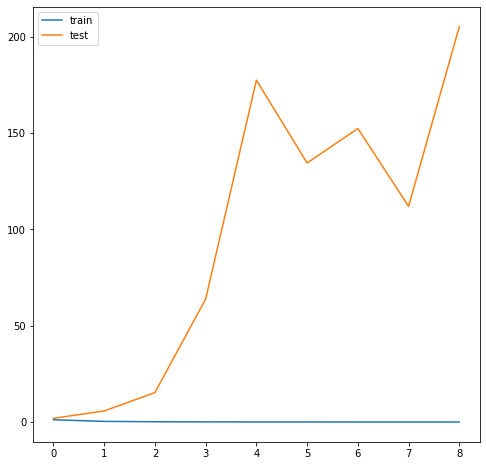

In [177]:
# evaluate the model

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Train: 0.344, Test: 0.582


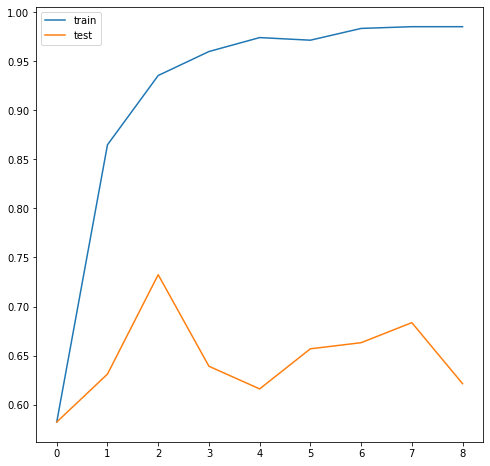

In [178]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Remarks: The performance of the CNN model is poor, however can likely be improved by further fine tuning.I would like say thanks to Archana Nallam for guiding me in feature extraction process of this Project-3 notebook.